<a href="https://colab.research.google.com/github/Niushamesgari/auto_pharmacy/blob/main/Auto_Pharmacy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="0TmfXz3UZSSiUMPMstoB")
project = rf.workspace("work-space-isqxc").project("auto-pharmacy-draft")
version = project.version(4)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 2.0 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics==8.0.196`, to intall it `pip install ultralytics==8.0.196`.



Extracting Dataset Version Zip to Auto-Pharmacy--draft-4 in yolov8:: 100%|██████████| 49272/49272 [00:09<00:00, 5395.92it/s]


In [2]:
config_file_template = '''
names:
- Alphintern
- Amaryl
- Anafronil
- Antinal
- Apidone
- Aspocid
- Augmentin
- Beclo
- Betaserc
- Bi-Alcofan
- Brufen
- Catafast
- Clearest
- Codilar
- Congestal
- Conventin
- Dermovate
- Diclac
- Dimra
- Erec
- Flumox
- Gaptin
- Hairtonic
- Hibiotic-N
- Isilin
- Kenacomb
- Ketolac
- Lidocaine
- Lustral
- Megalase
- Minalax
- Mosedin
- Napifit
- Neodine
- Neuroton
- Orcavi
- Panadol
- Paramol
- Powerecta
- Predsol
- Romantigra
- Rowachol
- Tegretol
- Telfast
- Tusskan
- Urinex
- Viotic
- Virecta
- Voltaren
- Xithrone
- Zyrtec
nc: 51
roboflow:
  license: CC BY 4.0
  project: auto-pharmacy-draft
  url: https://universe.roboflow.com/work-space-isqxc/auto-pharmacy-draft/dataset/4
  version: 4
  workspace: work-space-isqxc
val: /content/Auto-Pharmacy--draft-4/train/images
train: /content/Auto-Pharmacy--draft-4/train/images


'''

with open('/content/Auto-Pharmacy--draft-4/data.yaml', 'w') as f:
    f.write(config_file_template)

In [3]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 625.9 kB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_6

In [5]:
from ultralytics import YOLO
model = YOLO('best (2).pt')
  # build from YAML and transfer weights

# Train the model
#results = model.train(data='/content/Auto-Pharmacy--draft-4/data.yaml', epochs=10, imgsz=(268))

In [11]:
model.export()

Ultralytics YOLOv8.2.80 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n summary (fused): 168 layers, 3,015,593 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from 'runs/detect/train3/weights/best.pt' with input shape (1, 3, 288, 288) BCHW and output shape(s) (1, 55, 1701) (5.9 MB)

TorchScript: starting export with torch 2.3.1+cu121...
TorchScript: export success ✅ 1.6s, saved as 'runs/detect/train3/weights/best.torchscript' (11.9 MB)

Export complete (3.0s)
Results saved to /content/runs/detect/train3/weights
Predict:         yolo predict task=detect model=runs/detect/train3/weights/best.torchscript imgsz=288  
Validate:        yolo val task=detect model=runs/detect/train3/weights/best.torchscript imgsz=288 data=/content/Auto-Pharmacy--draft-4/data.yaml  
Visualize:       https://netron.app


'runs/detect/train3/weights/best.torchscript'


0: 288x288 1 Megalase, 114.5ms
1: 288x288 1 Megalase, 114.5ms
2: 288x288 1 Kenacomb, 114.5ms
3: 288x288 1 Romantigra, 114.5ms
Speed: 10.2ms preprocess, 114.5ms inference, 8.0ms postprocess per image at shape (1, 3, 288, 288)


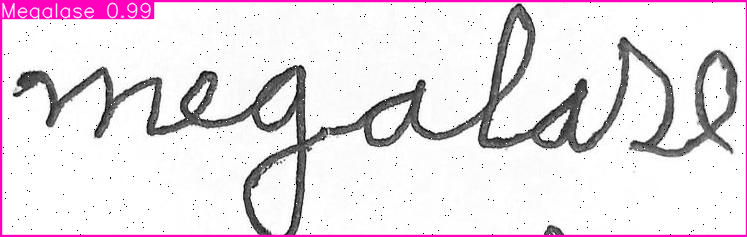

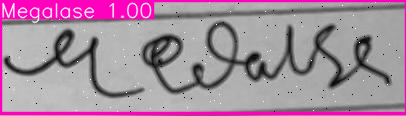

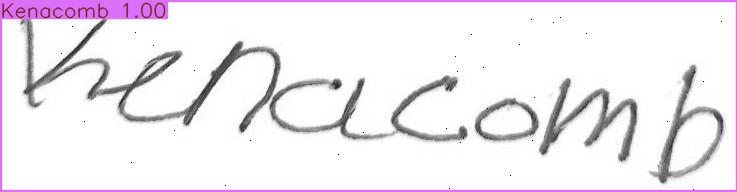

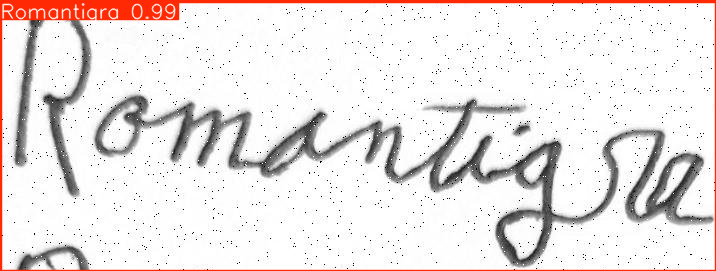

In [6]:
import glob
from PIL import Image
test_image=glob.glob('/content/Auto-Pharmacy--draft-4/train/images/*.jpg')
results=model(test_image[4:8],stream=False)
for i in range(4):
    res=results[i].plot()
    display(Image.fromarray(res))


In [7]:
!pip install --upgrade gradio==4.29

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 50.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.6/314.6 kB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 59.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.2/93.2 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 9.9 MB/s eta 0:00:00
  Attempting uninstall: tomlkit
    Found existing i

In [8]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [10]:
import gradio as gr


def detect_img(img):

  results=model([img],stream=False)
  res=results[0].plot()
  return Image.fromarray(res)


#them = gr.themes.Soft(primary_hue="sky", secondary_hue="stone", neutral_hue="neutral")


demo=gr.Interface(
    fn=detect_img,
    inputs=[gr.Image(format='pil')],
    outputs=[gr.Image(format = "pil")],
   # theme=them,
    title = "Auto Pharmacy Detection App"
)

In [ ]:
demo.launch(debug=True,share=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://b1eb6ed84c679cc3a2.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
